In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import datetime
import matplotlib.dates as dates

# 読込

## 東京都covid19感染情報

In [2]:
df = pd.read_csv('https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv')

In [3]:
df.head()

,No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,発症_年月日,確定_年月日,患者_居住地,患者_年代,患者_性別,患者_職業,患者_状態,患者_症状,患者_渡航歴の有無フラグ,患者_接触歴の有無フラグ,備考,退院済フラグ
0,1,130001,東京都,NaN,2020-01-24,NaN,NaN,湖北省武漢市,40代,男性,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2,130001,東京都,NaN,2020-01-25,NaN,NaN,湖北省武漢市,30代,女性,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,3,130001,東京都,NaN,2020-01-30,NaN,NaN,湖南省長沙市,30代,女性,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,4,130001,東京都,NaN,2020-02-13,NaN,NaN,都内,70代,男性,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,5,130001,東京都,NaN,2020-02-14,NaN,NaN,都内,50代,女性,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [4]:
df.shape

(113571, 17)

In [5]:
df.columns

Index(['No', '全国地方公共団体コード', '都道府県名', '市区町村名', '公表_年月日', '発症_年月日', '確定_年月日',
       '患者_居住地', '患者_年代', '患者_性別', '患者_職業', '患者_状態', '患者_症状', '患者_渡航歴の有無フラグ',
       '患者_接触歴の有無フラグ', '備考', '退院済フラグ'],
      dtype='object')

In [6]:
df.dtypes

No                int64
全国地方公共団体コード       int64
都道府県名            object
市区町村名           float64
公表_年月日           object
発症_年月日           object
確定_年月日           object
患者_居住地           object
患者_年代            object
患者_性別            object
患者_職業            object
患者_状態           float64
患者_症状           float64
患者_渡航歴の有無フラグ    float64
患者_接触歴の有無フラグ    float64
備考              float64
退院済フラグ          float64
dtype: object

In [7]:
print(df.isnull().sum())

No                   0
全国地方公共団体コード          0
都道府県名                0
市区町村名           113571
公表_年月日               0
発症_年月日           59167
確定_年月日           27627
患者_居住地             116
患者_年代                0
患者_性別                0
患者_職業            27627
患者_状態           113571
患者_症状           113571
患者_渡航歴の有無フラグ    113571
患者_接触歴の有無フラグ     77813
備考              113571
退院済フラグ            9111
dtype: int64


## PCR陽性者推移(公表_年月日)

In [66]:
print(df["公表_年月日"].min())
print(df["公表_年月日"].max())

2020-01-24
2021-03-08


In [67]:
df_kouhyo_dt = df.groupby("公表_年月日")["No"].size().reset_index()
df_kouhyo_dt.columns = ['公表_年月日', 'count']
df_kouhyo_dt["公表_年月日"] = pd.to_datetime(df_kouhyo_dt["公表_年月日"])

df_kouhyo_dt.head()

,公表_年月日,count
0,2020-01-24,1
1,2020-01-25,1
2,2020-01-30,1
3,2020-02-13,1
4,2020-02-14,2


In [68]:
df_kouhyo_dt.dtypes

公表_年月日    datetime64[ns]
count              int64
dtype: object

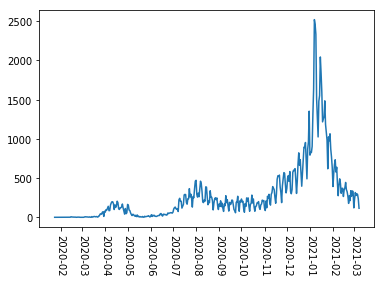

In [106]:
# プロットを表示するためにポップアップしたウィンドウをクローズ
plt.close(1)

# Figureの初期化とサイズの指定
figure_ = plt.figure(1)
# Figure内にAxesを追加()
axes_ = figure_.add_subplot(111)
axes_.plot(df_kouhyo_dt["公表_年月日"], df_kouhyo_dt["count"])

# 目盛り位置の設定
axes_.xaxis.set_major_locator(dates.MonthLocator([1,2,3,4,5,6,7,8,9,10,11,12]))
# 時刻軸のフォーマットを変更する（年月に）
axes_.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))

axes_.tick_params(axis='x', rotation=270)

- 欠損なし
- PCR検査結果の報告日時点での結果と思われる
- 周期性があるのは土日の結果を月曜日に報告しているから？

## 東京都気温・湿度と感染者数を比較

In [54]:
temp_df = pd.read_csv('../../dataset/covid19/20210308_data.csv', encoding = 'cp932')
temp_df.columns = ["yyyymmdd", "temp_ave", "Humid_ave"]


# ymの標記を変更
temp_df['y'] = temp_df['yyyymmdd'].str.split('/', expand=True)[0]
temp_df['m'] = temp_df['yyyymmdd'].str.split('/', expand=True)[1]
temp_df['d'] = temp_df['yyyymmdd'].str.split('/', expand=True)[2]

temp_df['m'] = temp_df['m'].str.rjust(2, "0")
temp_df['d'] = temp_df['d'].str.rjust(2, "0")

temp_df["yyyymmdd"] = temp_df['y'] + "-" + temp_df['m'] + "-" + temp_df['d']
temp_df = temp_df.drop(["y", "m", "d"], axis = 1)

temp_df["yyyymmdd"] = pd.to_datetime(temp_df["yyyymmdd"])

In [107]:
print(temp_df["yyyymmdd"].min())
print(temp_df["yyyymmdd"].max())

2020-01-01 00:00:00
2021-03-07 00:00:00


In [55]:
temp_df.head()

,yyyymmdd,temp_ave,Humid_ave
0,2020-01-01,5.5,49
1,2020-01-02,6.2,60
2,2020-01-03,6.1,63
3,2020-01-04,7.2,53
4,2020-01-05,5.4,61


In [56]:
temp_df.shape

(432, 3)

In [57]:
temp_df.columns

Index(['yyyymmdd', 'temp_ave', 'Humid_ave'], dtype='object')

In [58]:
temp_df.dtypes

yyyymmdd     datetime64[ns]
temp_ave            float64
Humid_ave             int64
dtype: object

In [59]:
print(temp_df.isnull().sum())

yyyymmdd     0
temp_ave     0
Humid_ave    0
dtype: int64


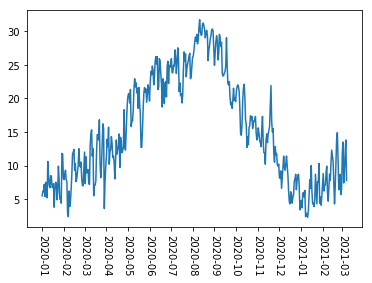

In [108]:
# プロットを表示するためにポップアップしたウィンドウをクローズ
plt.close(1)

# Figureの初期化とサイズの指定
figure_ = plt.figure(1)
# Figure内にAxesを追加()
axes_ = figure_.add_subplot(111)
axes_.plot(temp_df["yyyymmdd"], temp_df["temp_ave"])

# 目盛り位置の設定
axes_.xaxis.set_major_locator(dates.MonthLocator([1,2,3,4,5,6,7,8,9,10,11,12]))
# 時刻軸のフォーマットを変更する（年月に）
axes_.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))

axes_.tick_params(axis='x', rotation=270)

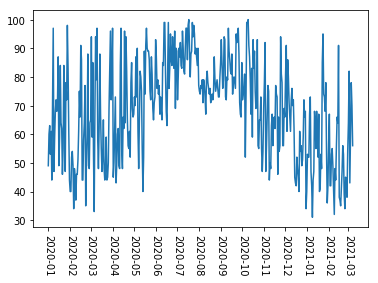

In [109]:
# プロットを表示するためにポップアップしたウィンドウをクローズ
plt.close(1)

# Figureの初期化とサイズの指定
figure_ = plt.figure(1)
# Figure内にAxesを追加()
axes_ = figure_.add_subplot(111)
axes_.plot(temp_df["yyyymmdd"], temp_df["Humid_ave"])

# 目盛り位置の設定
axes_.xaxis.set_major_locator(dates.MonthLocator([1,2,3,4,5,6,7,8,9,10,11,12]))
# 時刻軸のフォーマットを変更する（年月に）
axes_.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))

axes_.tick_params(axis='x', rotation=270)

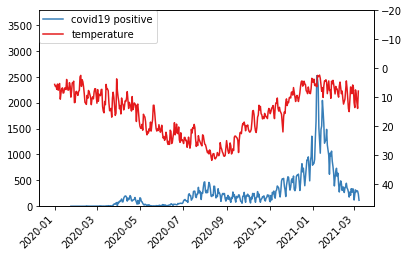

In [105]:
fig, ax1 = plt.subplots()
 
# ax1とax2を関連させる
ax2 = ax1.twinx()
  
# それぞれのaxesオブジェクトのlines属性にLine2Dオブジェクトを追加
ax1.plot(df_kouhyo_dt["公表_年月日"], df_kouhyo_dt["count"], color=cm.Set1.colors[1],label="covid19 positive")
ax2.plot(temp_df["yyyymmdd"], temp_df["temp_ave"],
         color=cm.Set1.colors[0], label="temperature")
 
fig.autofmt_xdate(rotation=45)
    
# 凡例
# グラフの本体設定時に、ラベルを手動で設定する必要があるのは、barplotのみ。plotは自動で設定される＞
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
# 凡例をまとめて出力する
ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)

pageview_max = 1.5 * max(df_kouhyo_dt["count"])
register_max = 1.5 * max(temp_df["temp_ave"])
    
ax1.set_ylim([0, pageview_max])
ax2.set_ylim([-20, register_max])

ax2.invert_yaxis()

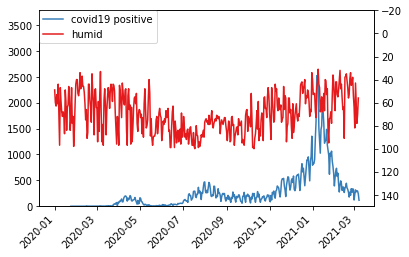

In [104]:
fig, ax1 = plt.subplots()
 
# ax1とax2を関連させる
ax2 = ax1.twinx()
  
# それぞれのaxesオブジェクトのlines属性にLine2Dオブジェクトを追加
ax1.plot(df_kouhyo_dt["公表_年月日"], df_kouhyo_dt["count"], color=cm.Set1.colors[1],label="covid19 positive")
ax2.plot(temp_df["yyyymmdd"], temp_df["Humid_ave"],
         color=cm.Set1.colors[0], label="humid")
 
fig.autofmt_xdate(rotation=45)
    
# 凡例
# グラフの本体設定時に、ラベルを手動で設定する必要があるのは、barplotのみ。plotは自動で設定される＞
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
# 凡例をまとめて出力する
ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)

pageview_max = 1.5 * max(df_kouhyo_dt["count"])
register_max = 1.5 * max(temp_df["Humid_ave"])
    
ax1.set_ylim([0, pageview_max])
ax2.set_ylim([-20, register_max])

ax2.invert_yaxis()